# Playground

In [1]:
import numpy as np
import pandas as pd
import os
import pprint
from os.path import exists


from evo.core.trajectory import PoseTrajectory3D
from evo.tools import plot
from evo.core import metrics

import matplotlib.pyplot as plt

from pose_trajectory_evaluation import PoseTrajectoryEvaluation


%matplotlib inline
# %matplotlib notebook
%reload_ext autoreload
%autoreload 2

Updated outdated /home/berlukas/.evo/settings.json


In [2]:
pose_filename = 'vertex_poses_velocities_biases.csv'
# server_path = '/tmp/maplab_server/merged_map/'
server_path = '/mnt/data/datasets/fgsp/gt/merged_map/'

est_traj_file = server_path + pose_filename
gt_traj_file = '/mnt/data/datasets/fgsp/gt/hagerbach_anymal_2/gt.npy'
if not exists(est_traj_file):
    print(f'Estimation does not exist!')
    
if not exists(gt_traj_file):
    print(f'Ground truth does not exist!')
    
eval = PoseTrajectoryEvaluation(est_traj_file)
gt_traj = np.load(gt_traj_file)

est_traj, gt_traj = eval.compute_synchronized_trajectories_with_evo3(gt_traj)
error = eval.compute_evo_trans_ape_rmse(est_traj, gt_traj)
print(f'Error is {error}')


Error is 18.407926694020357


In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=160)
plt.plot(gt_traj[:,1], gt_traj[:,2], label='Ground Truth')
plt.plot(est_traj[:,1], est_traj[:,2], label='Estimation')
plt.legend()
plt.show()

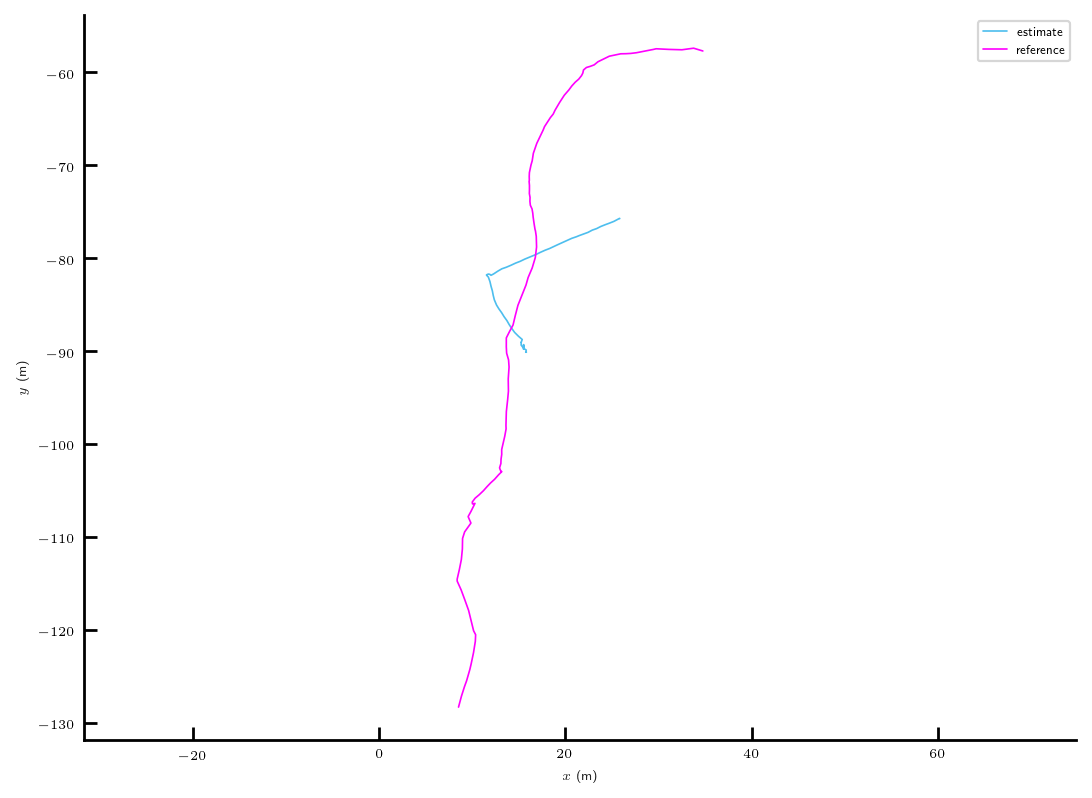

AttributeError: 'float' object has no attribute 'items'

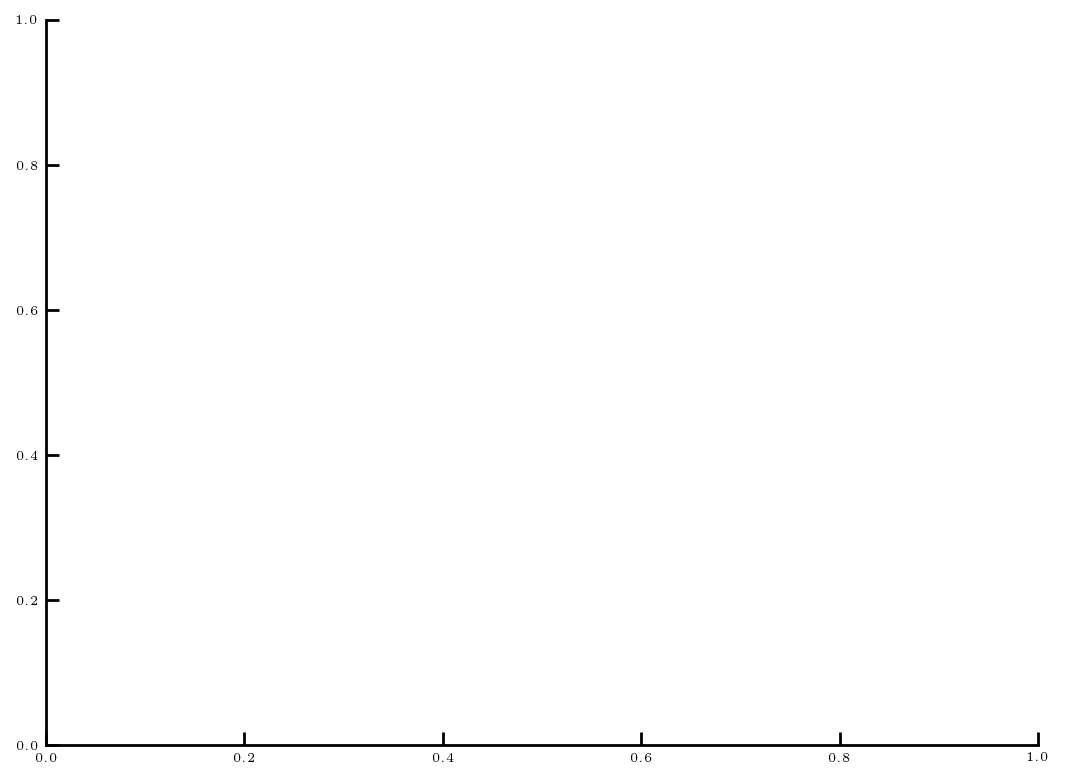

In [6]:
def plot_evaluations_APE(data, ape_metric, ape_stats):
    # Trajectory plot
    fig = plt.figure(figsize=(8, 6), dpi=160)
    traj_by_label = {
        "estimate": data[1],
        "reference": data[0]
    }
    plot.trajectories(fig, traj_by_label, plot.PlotMode.xy)
    plt.show()

    # Trajectory plot
    seconds_from_start = [t - data[1].timestamps[0] for t in data[1].timestamps]
    fig = plt.figure(figsize=(8, 6), dpi=160)
    plot.error_array(fig.gca(), ape_metric.error, x_array=seconds_from_start,
                     statistics={s:v for s,v in ape_stats.items() if s != "sse"},
                     name="APE", title="APE w.r.t. " + ape_metric.pose_relation.value, xlabel="$t$ (s)")
    plt.show()

    plot_mode = plot.PlotMode.xy
    fig = plt.figure(figsize=(8, 6), dpi=160)
    ax = plot.prepare_axis(fig, plot_mode)
    plot.traj(ax, plot_mode, gt_traj, '--', "gray", "reference")
    plot.traj_colormap(ax, data[1], ape_metric.error, 
                       plot_mode, min_map=ape_stats["min"], max_map=ape_stats["max"])
    ax.legend()
    plt.show()
    
data = (gt_traj, est_traj)
pose_relation = metrics.PoseRelation.translation_part
ape_metric_trans = metrics.APE(pose_relation)
ape_metric_trans.process_data(data)
ape_stats = ape_metric_trans.get_statistic(metrics.StatisticsType.rmse)
plot_evaluations_APE(data, ape_metric_trans, ape_stats)